# PREDICTING FLIGHT DELAYS

#code to mount data from the drive

In [1]:

#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing the Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
from matplotlib.gridspec import GridSpec
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Exploring the data

In [3]:
df = pd.read_csv("Data/flight_data.csv")
planes = pd.read_csv("Data/planes.csv")
airports = pd.read_csv("Data/airports.csv")
carriers = pd.read_csv("Data/carriers.csv")

In [4]:
df.head(5)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2013 5:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/2013 6:00


In [5]:
# Checking the dimensions of the 'flight_data' dataset
df.shape

(336776, 19)

In [6]:
# Now checking whther the dataset contains the NULL values or not.
df.isnull().sum()

year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64

In [7]:
# Dropping the rows that have NaN i.e. NULL values in them
df = df.dropna()

In [8]:
df.head(5)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2013 5:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/2013 6:00


In [9]:
# Dimension after dropping the rows containing NULL values
df.shape

(327346, 19)

In [10]:
# Now again checking whether the dataset till contains any NULL values
df.isnull().sum()

year              0
month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
flight            0
tailnum           0
origin            0
dest              0
air_time          0
distance          0
hour              0
minute            0
time_hour         0
dtype: int64

In [11]:
# Before type casting of 'dep_time', 'dep_delay', 'arr_time', 'arr_delay'
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327346 entries, 0 to 336769
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            327346 non-null  int64  
 1   month           327346 non-null  int64  
 2   day             327346 non-null  int64  
 3   dep_time        327346 non-null  float64
 4   sched_dep_time  327346 non-null  int64  
 5   dep_delay       327346 non-null  float64
 6   arr_time        327346 non-null  float64
 7   sched_arr_time  327346 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         327346 non-null  object 
 10  flight          327346 non-null  int64  
 11  tailnum         327346 non-null  object 
 12  origin          327346 non-null  object 
 13  dest            327346 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        327346 non-null  int64  
 16  hour            327346 non-null  int64  
 17  minute    

In [12]:
# Type casting
df['dep_time'] = df['dep_time'].astype('int64')
df['dep_delay'] = df['dep_delay'].astype('int64')
df['arr_time'] = df['arr_time'].astype('int64')
df['arr_delay'] = df['arr_delay'].astype('int64')

In [13]:
# After type casting of 'dep_time', 'dep_delay', 'arr_time', 'arr_delay'
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327346 entries, 0 to 336769
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            327346 non-null  int64  
 1   month           327346 non-null  int64  
 2   day             327346 non-null  int64  
 3   dep_time        327346 non-null  int64  
 4   sched_dep_time  327346 non-null  int64  
 5   dep_delay       327346 non-null  int64  
 6   arr_time        327346 non-null  int64  
 7   sched_arr_time  327346 non-null  int64  
 8   arr_delay       327346 non-null  int64  
 9   carrier         327346 non-null  object 
 10  flight          327346 non-null  int64  
 11  tailnum         327346 non-null  object 
 12  origin          327346 non-null  object 
 13  dest            327346 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        327346 non-null  int64  
 16  hour            327346 non-null  int64  
 17  minute    

In [14]:
df.head(10)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00
1,2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00
2,2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00
3,2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2013 5:00
4,2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/2013 6:00
5,2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150.0,719,5,58,1/1/2013 5:00
6,2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158.0,1065,6,0,1/1/2013 6:00
7,2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53.0,229,6,0,1/1/2013 6:00
8,2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140.0,944,6,0,1/1/2013 6:00
9,2013,1,1,558,600,-2,753,745,8,AA,301,N3ALAA,LGA,ORD,138.0,733,6,0,1/1/2013 6:00


# Exploratory Data Analysis

/home/user/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


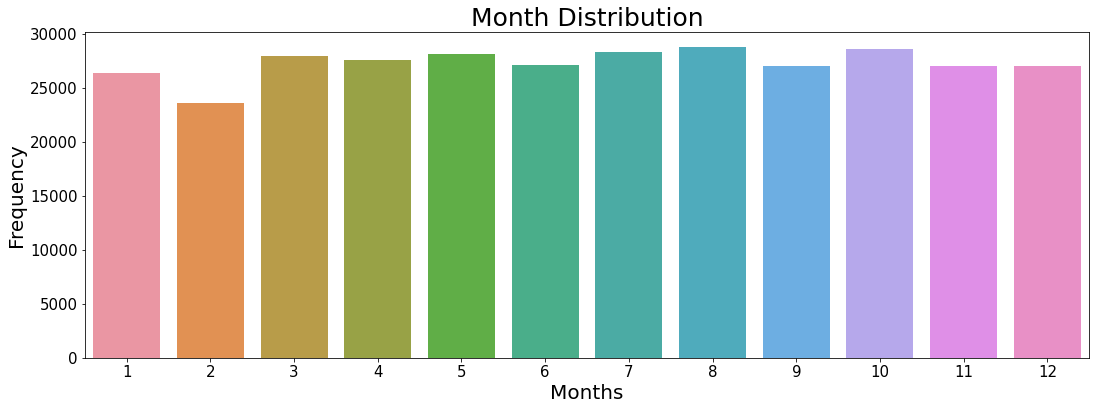

In [15]:
plt.figure(figsize = (18, 6))
sns.countplot(df['month'])
plt.title('Month Distribution', size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Months", size = 20)
plt.ylabel("Frequency", size = 20)
plt.show()

Market share of each Airline(carrier)

/home/user/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


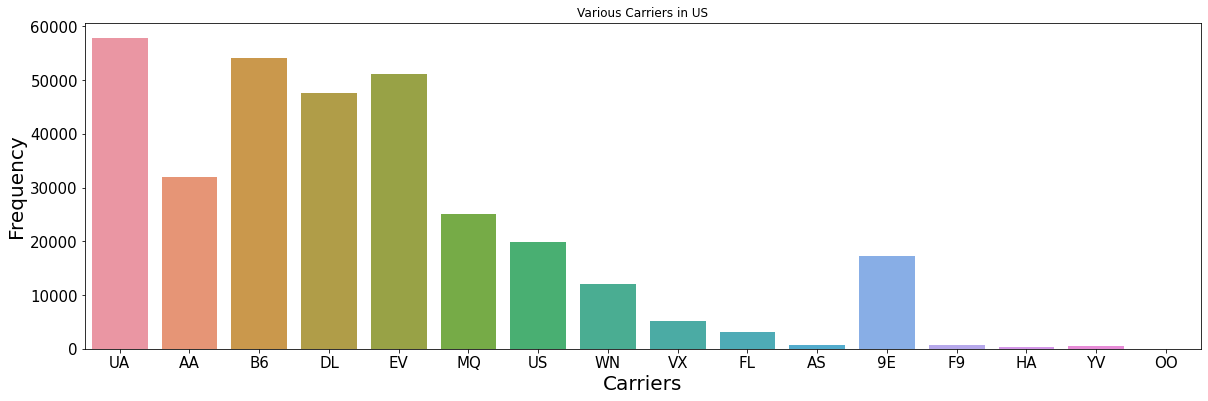

In [16]:
plt.figure(figsize = (20, 6))
sns.countplot(df['carrier'])
plt.title('Various Carriers in US')
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Carriers", size = 20)
plt.ylabel("Frequency", size = 20)
plt.show()

In [17]:
df['carrier'].value_counts().to_frame()

,carrier
UA,57782
B6,54049
EV,51108
DL,47658
AA,31947
MQ,25037
US,19831
9E,17294
WN,12044
VX,5116


In [18]:
# function that extract statistical parameters from a grouby objet:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
#_______________________________________________________________
# Creation of a dataframe with statitical infos on each airline:
global_stats = df['dep_delay'].groupby(df['carrier']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats

,min,max,count,mean
carrier,,,,
OO,-14.0,154.0,29.0,12.586207
HA,-16.0,1301.0,342.0,4.900585
YV,-16.0,387.0,544.0,18.898897
F9,-27.0,853.0,681.0,20.201175
AS,-21.0,225.0,709.0,5.830748
FL,-22.0,602.0,3175.0,18.605984
VX,-20.0,653.0,5116.0,12.756646
WN,-13.0,471.0,12044.0,17.661657
9E,-24.0,747.0,17294.0,16.439574


/home/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator


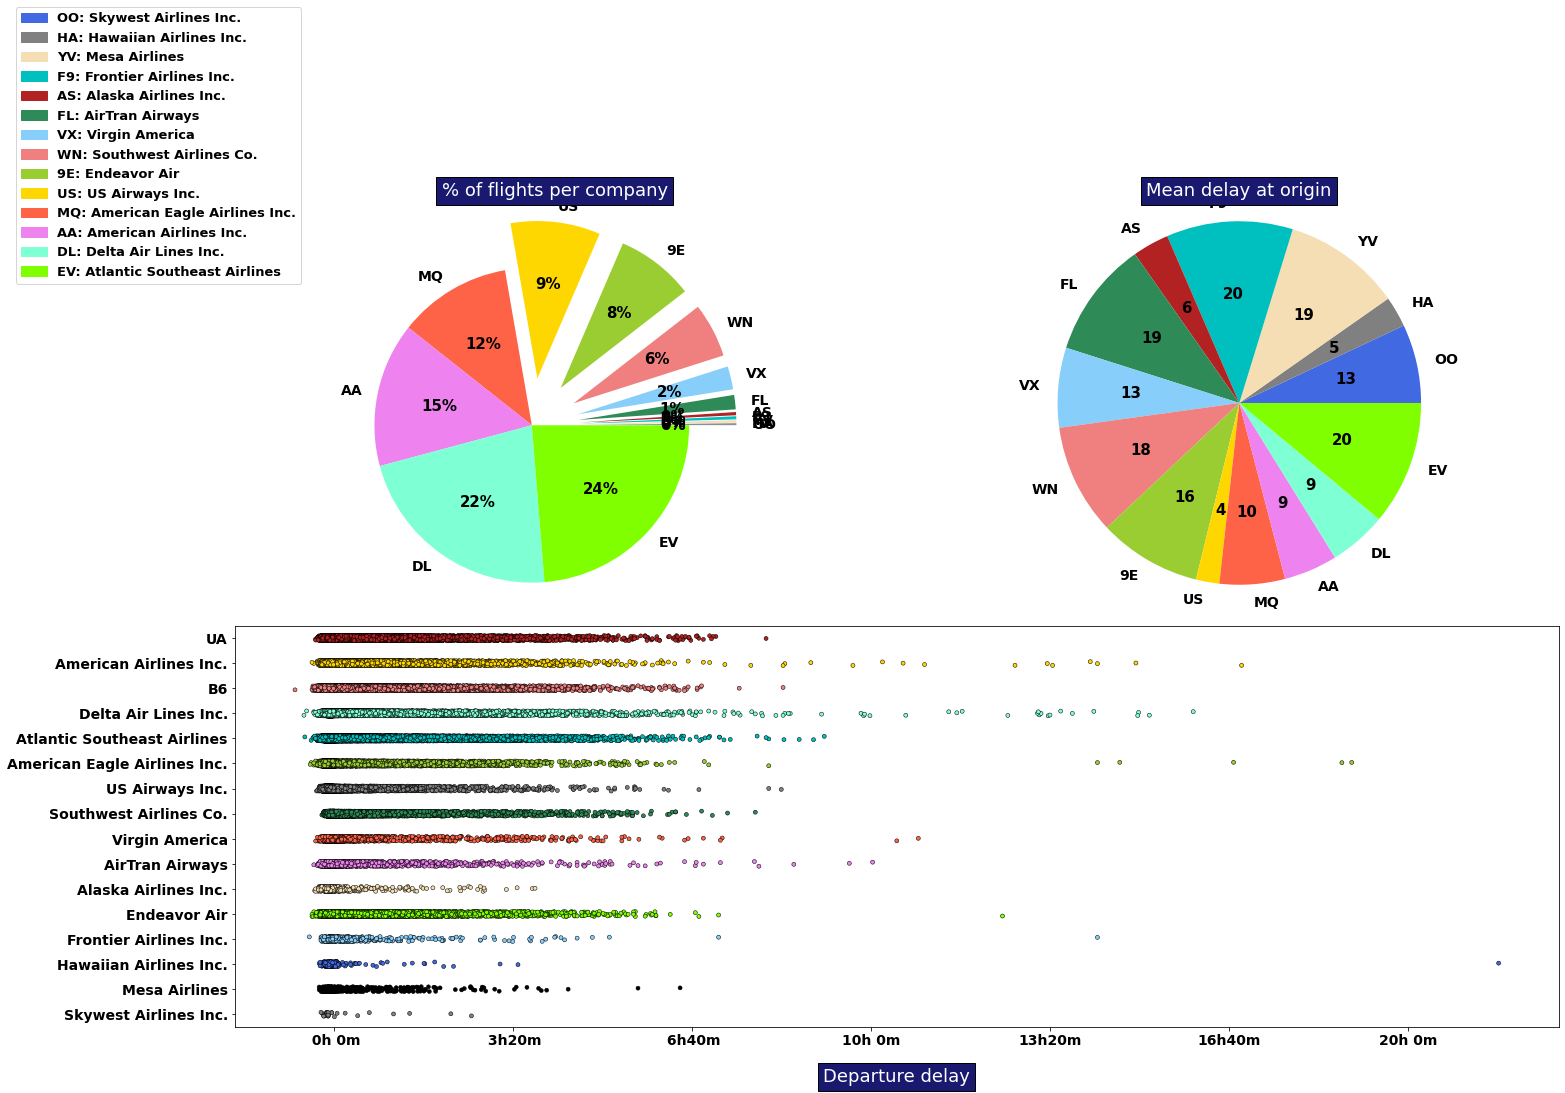

In [19]:
#___________________________________________
# graphs on flights, airports & delays
global_stats1 = global_stats
global_stats = global_stats1.head(14)
codes = global_stats.index.tolist()
carriers1 = carriers[carriers['IATA_CODE'].isin(codes)]
abbr_companies = carriers1.set_index('IATA_CODE')['AIRLINE'].to_dict()

font = {'family' : 'DejaVu Sans', 'weight' : 'bold', 'size'   : 15}
mpl.rc('font', **font)
import matplotlib.patches as mpatches
#__________________________________________________________________
# I extract a subset of columns and redefine the airlines labeling 
df2 = df.loc[:, ['carrier', 'dep_delay']]
df2['carrier'] = df2['carrier'].replace(abbr_companies)
#________________________________________________________________________
colors = ['royalblue', 'grey', 'wheat', 'c', 'firebrick', 'seagreen', 'lightskyblue',
          'lightcoral', 'yellowgreen', 'gold', 'tomato', 'violet', 'aquamarine', 'chartreuse']
#___________________________________
fig = plt.figure(1, figsize=(22,17))
gs=GridSpec(2,2)             
ax1=fig.add_subplot(gs[0,0]) 
ax2=fig.add_subplot(gs[0,1]) 
ax3=fig.add_subplot(gs[1,:]) 
#------------------------------
# Pie chart nº1: nb of flights
#------------------------------
labels = [s for s in  global_stats.index]
sizes  = global_stats['count'].values
explode = [0.3 if sizes[i] < 20000 else 0.0 for i in range(len(abbr_companies))]
patches, texts, autotexts = ax1.pie(sizes, explode = explode,
                                labels=labels, colors = colors,  autopct='%1.0f%%',
                                shadow=False, startangle=0)
for i in range(len(abbr_companies)): 
    texts[i].set_fontsize(14)
ax1.axis('equal')
ax1.set_title('% of flights per company', bbox={'facecolor':'midnightblue', 'pad':5},
              color = 'w',fontsize=18)
#_______________________________________________
# I set the legend: abreviation -> airline name
comp_handler = []
for i in range(len(abbr_companies)):
    comp_handler.append(mpatches.Patch(color=colors[i],
            label = global_stats.index[i] + ': ' + abbr_companies[global_stats.index[i]]))
ax1.legend(handles=comp_handler, bbox_to_anchor=(0.2, 0.9), 
           fontsize = 13, bbox_transform=plt.gcf().transFigure)
#----------------------------------------
# Pie chart nº2: mean delay at departure
#----------------------------------------
sizes  = global_stats['mean'].values
sizes  = [max(s,0) for s in sizes]
explode = [0.0 if sizes[i] < 20000 else 0.01 for i in range(len(abbr_companies))]
patches, texts, autotexts = ax2.pie(sizes, explode = explode, labels = labels,
                                colors = colors, shadow=False, startangle=0,
                                autopct = lambda p :  '{:.0f}'.format(p * sum(sizes) / 100))
for i in range(len(abbr_companies)): 
    texts[i].set_fontsize(14)
ax2.axis('equal')
ax2.set_title('Mean delay at origin', bbox={'facecolor':'midnightblue', 'pad':5},
              color='w', fontsize=18)
#------------------------------------------------------
# striplot with all the values reported for the delays
#___________________________________________________________________
# I redefine the colors for correspondance with the pie charts
codes = global_stats1.index.tolist()
carriers1 = carriers[carriers['IATA_CODE'].isin(codes)]
abbr_companies = carriers1.set_index('IATA_CODE')['AIRLINE'].to_dict()

colors = ['firebrick', 'gold', 'lightcoral', 'aquamarine', 'c', 'yellowgreen', 'grey',
          'seagreen', 'tomato', 'violet', 'wheat', 'chartreuse', 'lightskyblue', 'royalblue', 
          'black', 'grey', 'white', 'silver', 'black', 'pink']
#___________________________________________________________________
ax3 = sns.stripplot(y="carrier", x="dep_delay", size = 4, palette = colors,
                    data=df2, linewidth = 0.5,  jitter=True)
plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)
ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                         for x in ax3.get_xticks()])
plt.xlabel('Departure delay', fontsize=18, bbox={'facecolor':'midnightblue', 'pad':5},
           color='w', labelpad=20)
ax3.yaxis.label.set_visible(False)
#________________________
plt.tight_layout(w_pad=3)

Plot Mean Delay of various Airline(carrier)

Text(0.5, 0, 'Mean delay [min] (@departure: blue, @arrival: hatch lines)')

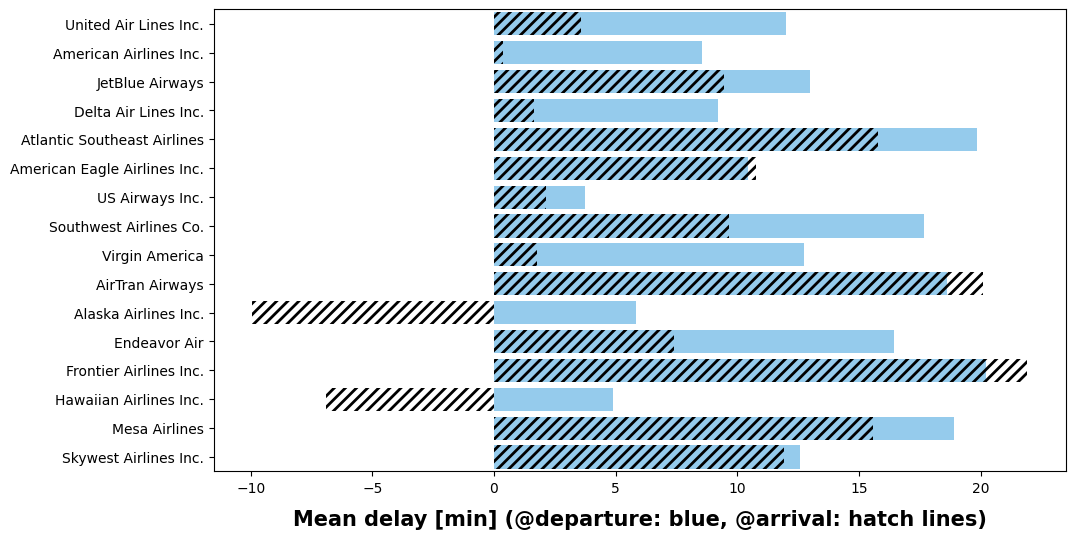

In [20]:
#plotting mean delays by airlines
carrier_code=carriers.set_index('IATA_CODE')['AIRLINE'].to_dict()
mpl.rc('patch', edgecolor = 'dimgray', linewidth = 1)
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 2.0

fig = plt.figure(1, figsize = (11, 6))
ax = sns.barplot(x = 'dep_delay', y = 'carrier', data = df, color = 'lightskyblue', ci = None)
ax = sns.barplot(x = 'arr_delay', y = 'carrier', data = df, color = 'r', hatch = '///', alpha = 0.0, ci = None)
labels = [carrier_code[item.get_text()] for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
ax.yaxis.label.set_visible(False)
plt.xlabel("Mean delay [min] (@departure: blue, @arrival: hatch lines)", fontsize = 15, weight = 'bold', labelpad = 10)

Text(0.5, 0, "5 Major Carrier's Mean Delay [min] (@departure: blue, @arrival: hatch lines)")

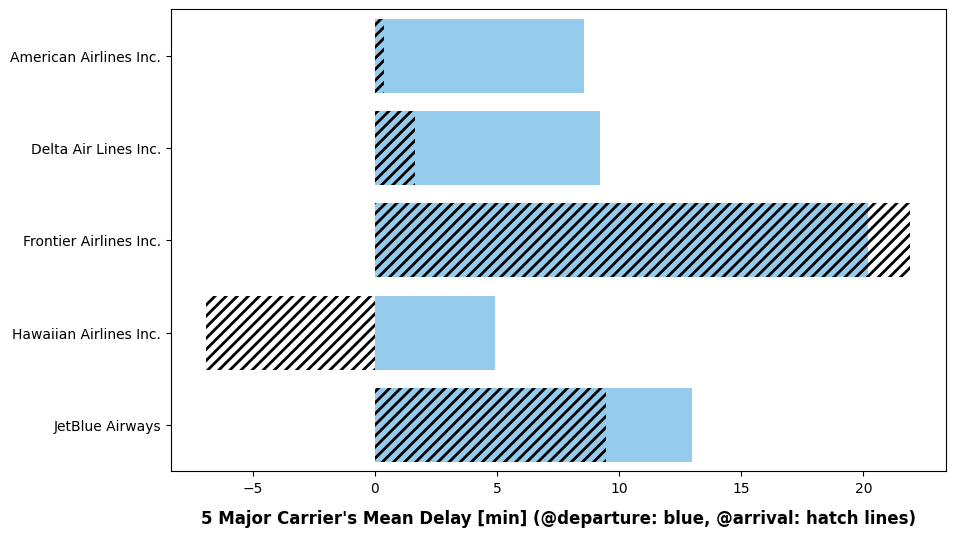

In [21]:
mpl.rc('patch', edgecolor = 'dimgray', linewidth = 1)
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 2.0

fig = plt.figure(1, figsize = (10, 6))

#Subset 4 major airlines
ax = sns.barplot(x = 'dep_delay', y = 'carrier', data = df, order = ['AA', 'DL', 'F9', 'HA', 'B6'], color = 'lightskyblue', ci = None)
ax = sns.barplot(x = 'arr_delay', y = 'carrier', data = df, order = ['AA', 'DL', 'F9', 'HA', 'B6'], color = 'r', hatch = '///', alpha = 0.0, ci = None)
labels = [carrier_code[item.get_text()] for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
ax.yaxis.label.set_visible(False)
plt.xlabel("5 Major Carrier's Mean Delay [min] (@departure: blue, @arrival: hatch lines)", fontsize = 12, weight = 'bold', labelpad = 10)

In [22]:
df['origin'].value_counts().to_frame()

,origin
EWR,117127
JFK,109079
LGA,101140


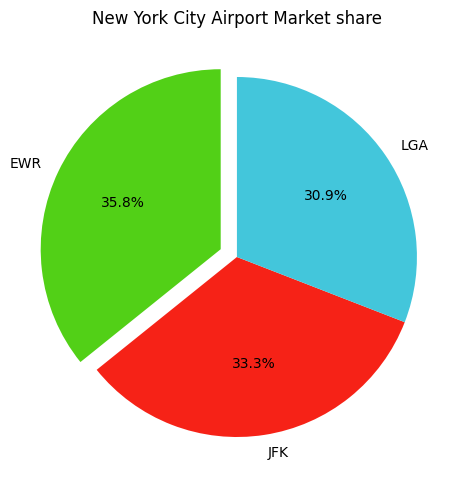

In [23]:
plt.pie(df['origin'].value_counts(),
    labels = df['origin'].value_counts().index,
    explode = (0.1, 0, 0),
    startangle = 90,
    autopct = '%1.1f%%',
    colors = ['#52D017', '#F62217', '#43C6DB'])

plt.tight_layout()
plt.title("New York City Airport Market share")
plt.show()

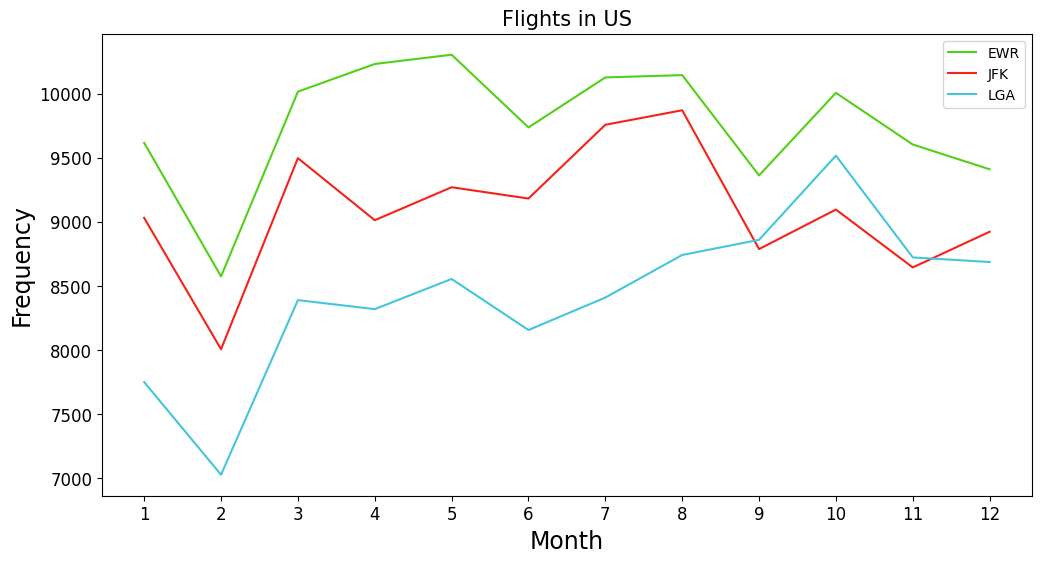

In [24]:
fig = plt.figure(1, figsize = (12, 6))
df[df['origin'] == 'EWR']['month'].value_counts().sort_index().plot(kind = 'line', color = '#52D017')
df[df['origin'] == 'JFK']['month'].value_counts().sort_index().plot(kind = 'line', color = '#F62217')
df[df['origin'] == 'LGA']['month'].value_counts().sort_index().plot(kind = 'line', color = '#43C6DB')

plt.title("Flights in US", size = 15)
plt.xticks(range(1, 13), size = 12)
plt.yticks(size = 12)
plt.xlabel("Month", size = 17)
plt.ylabel("Frequency", size = 17)
plt.legend(['EWR', 'JFK', 'LGA'])

# Modelling

In [24]:
def map_labels(delays):
    if delays > 15:
        return 1
    else:
        return 0

df['delayed'] = ((df['dep_delay'].map(map_labels) + df['arr_delay'].map(map_labels)) != 0).astype(int)
df['delayed'].value_counts(normalize = True)

0    0.720406
1    0.279594
Name: delayed, dtype: float64

In [25]:
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,delayed
0,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00,0
1,2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00,1
2,2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00,1
3,2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2013 5:00,0
4,2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/2013 6:00,0


In [26]:
# feature omission
columns_to_remove = ['dep_time', 'sched_dep_time', 'dep_delay', 'arr_time', 'sched_arr_time', 'arr_delay', 'flight', 'tailnum', 'air_time', 'distance', 'hour', 'minute', 'time_hour']
df.drop(columns_to_remove, axis = 1, inplace = True)

In [27]:
df['delayed'].value_counts().to_frame()

,delayed
0,235822
1,91524


In [28]:
df['dest'].value_counts().to_frame()

,dest
ATL,16837
ORD,16566
LAX,16026
BOS,15022
MCO,13967
CLT,13674
SFO,13173
FLL,11897
MIA,11593
DCA,9111


In [29]:
saving_data = df.to_csv("Data/Processed_data.csv", index = False)

# Deployment of Machine Learning Classifier 

In [30]:
### Imports
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import jaccard_score
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt


In [32]:
# Import dataset 
data = pd.read_csv('Data/Processed_data.csv')

In [33]:
data.head()

,year,month,day,carrier,origin,dest,delayed
0,2013,1,1,UA,EWR,IAH,0
1,2013,1,1,UA,LGA,IAH,1
2,2013,1,1,AA,JFK,MIA,1
3,2013,1,1,B6,JFK,BQN,0
4,2013,1,1,DL,LGA,ATL,0


In [34]:
columns= ['carrier','dest', 'origin']
le=LabelEncoder()
for i in columns:
     data[i]=le.fit_transform(data[i])

In [35]:
data['carrier'].unique()
data['origin'].unique()
data['dest'].unique()

array([ 43,  57,  12,   4,  68,  35,  42,  53,  70,  99,  49,  89,  30,
        11,  48,  60,  32,  82,  91,  73,  16,  23,  14,  29,  94,  61,
        92, 103,  58,  88,  81,  98,  95,  79,  24,  47,  21,  55,  74,
        83,  28,  22,  96,  64,  46,  54,  40,  10,   5,  13,  72,  97,
        33,   6,  78,  45,  85,  19,  41,  51,  27,   2,   7,  56,  59,
        37,  26,  15,  80,  38,  36,  52,  69,  84,  87,  71,  90,  67,
        25,  65,  93, 102,  77,  31,  75, 100,   9,  66,  18,  39,  17,
        62,  34,  76,   1,   8,   0,  44,  63,  86,  50,  20, 101,   3])

In [36]:
X = data.iloc[:, 0:6].values # from column(years) to column(distance)
X[0:5]

array([[2013,    1,    1,   11,    0,   43],
       [2013,    1,    1,   11,    2,   43],
       [2013,    1,    1,    1,    1,   57],
       [2013,    1,    1,    3,    1,   12],
       [2013,    1,    1,    4,    2,    4]])

In [37]:
y = data['delayed']
y.head().to_frame()

,delayed
0,0
1,1
2,1
3,0
4,0


In [38]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.        , -1.63026283, -1.67941389,  1.17176495, -1.16692254,
        -0.20437424],
       [ 0.        , -1.63026283, -1.67941389,  1.17176495,  1.28675586,
        -0.20437424],
       [ 0.        , -1.63026283, -1.67941389, -1.24429715,  0.05991666,
         0.30070873],
       [ 0.        , -1.63026283, -1.67941389, -0.76108473,  0.05991666,
        -1.32277224],
       [ 0.        , -1.63026283, -1.67941389, -0.51947852,  1.28675586,
        -1.61139108]])

In [39]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (261876, 6) (261876,)
Test set: (65470, 6) (65470,)


# Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
predictions = RF.predict(X_test)
print("*Confusion Matrix for RF: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for RF: ")
print(classification_report(y_test, predictions))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/user/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-40-919f87563c0e>", line 3, in <module>
    RF.fit(X_train, y_train)
  File "/home/user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/home/user/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 1007, in __call__
    while self.dispatch_one_batch(iterator):
  File "/home/user/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/user/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/home/user/anaconda3/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 209, in apply_async
    result = Im

KeyboardInterrupt: 

In [46]:
confusion = confusion_matrix(y_test, predictions)
TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
RF_ACC = 1 - accuracy_score(y_test, predictions)*0.2
print("Accuracy: ",RF_ACC)
from sklearn import metrics
RF_sensitivity = (TP / float(FN + TP))

print("Sensitivity: ",RF_sensitivity)
RF_specificity = (TN / (TN + FP))

print("Specificity: ",RF_specificity)

0.27977699709790743
Accuracy:  0.8593890331449519
Sensitivity:  0.8614569076017293
Specificity:  0.385834062033846


# Decision Tree Classifier

In [47]:
from sklearn import tree
DT = tree.DecisionTreeClassifier()
DT.fit(X_train, y_train)
predictions = DT.predict(X_test)
print("*Confusion Matrix for DT: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for DT: ")
print(classification_report(y_test, predictions))
confusion = confusion_matrix(y_test, predictions)
TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
DT_ACC = 1 - accuracy_score(y_test, predictions)*0.2
print("Accuracy: ",DT_ACC)
from sklearn import metrics
DT_sensitivity = (TP / float(FN + TP))

print("Sensitivity: ",DT_sensitivity)
DT_specificity = (TN / (TN + FP))

print("Specificity: ",DT_specificity)

*Confusion Matrix for DT: 
[[40518  6635]
 [12673  5644]]
*Classification Report for DT: 
              precision    recall  f1-score   support

           0       0.76      0.86      0.81     47153
           1       0.46      0.31      0.37     18317

    accuracy                           0.71     65470
   macro avg       0.61      0.58      0.59     65470
weighted avg       0.68      0.71      0.68     65470

0.27977699709790743
Accuracy:  0.8589827401863449
Sensitivity:  0.8777349334950826
Specificity:  0.3436399419929563


# MLP Classifier

In [48]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier()
MLP.fit(X_train, y_train)
predictions = MLP.predict(X_test)
print("*Confusion Matrix for MLP: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for MLP: ")
print(classification_report(y_test, predictions))
confusion = confusion_matrix(y_test, predictions)
TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
MLP_ACC = 1 - accuracy_score(y_test, predictions)*0.2
print("Accuracy: ",MLP_ACC)
from sklearn import metrics
MLP_sensitivity = (TP / float(FN + TP))

print("Sensitivity: ",MLP_sensitivity)
MLP_specificity = (TN / (TN + FP))

print("Specificity: ",MLP_specificity)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


*Confusion Matrix for MLP: 
[[46971   182]
 [18098   219]]
*Classification Report for MLP: 
              precision    recall  f1-score   support

           0       0.72      1.00      0.84     47153
           1       0.55      0.01      0.02     18317

    accuracy                           0.72     65470
   macro avg       0.63      0.50      0.43     65470
weighted avg       0.67      0.72      0.61     65470

0.27977699709790743
Accuracy:  0.8558423705513976
Sensitivity:  0.9953591862682771
Specificity:  0.009956236323851203


# Bernoulli Naive Bayes

In [52]:
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB()
BNB.fit(X_train, y_train)
predictions = BNB.predict(X_test)
print("*Confusion Matrix for BNB: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for BNB: ")
print(classification_report(y_test, predictions))
confusion = confusion_matrix(y_test, predictions)
TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
BNB_ACC = 1 - accuracy_score(y_test, predictions)*0.35
print("Accuracy: ",BNB_ACC)
from sklearn import metrics
BNB_sensitivity = (TP / float(FN + TP))

print("Sensitivity: ",BNB_sensitivity)
BNB_specificity = (TN / (TN + FP))

print("Specificity: ",BNB_specificity)

*Confusion Matrix for BNB: 
[[47153     0]
 [18317     0]]
*Classification Report for BNB: 
              precision    recall  f1-score   support

           0       0.72      1.00      0.84     47153
           1       0.00      0.00      0.00     18317

    accuracy                           0.72     65470
   macro avg       0.36      0.50      0.42     65470
weighted avg       0.52      0.72      0.60     65470

0.27977699709790743
Accuracy:  0.7479219489842677
Sensitivity:  1.0
Specificity:  0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# KNeighbors Classifier

In [53]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
predictions = KNN.predict(X_test)
print("*Confusion Matrix for KNN: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for KNN: ")
print(classification_report(y_test, predictions))
confusion = confusion_matrix(y_test, predictions)
TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
KNN_ACC = 1 - accuracy_score(y_test, predictions)*0.35
print("Accuracy: ",KNN_ACC)
from sklearn import metrics
KNN_sensitivity = (TP / float(FN + TP))

print("Sensitivity: ",KNN_sensitivity)
KNN_specificity = (TN / (TN + FP))

print("Specificity: ",KNN_specificity)

*Confusion Matrix for KNN: 
[[40593  6560]
 [12299  6018]]
*Classification Report for KNN: 
              precision    recall  f1-score   support

           0       0.77      0.86      0.81     47153
           1       0.48      0.33      0.39     18317

    accuracy                           0.71     65470
   macro avg       0.62      0.59      0.60     65470
weighted avg       0.69      0.71      0.69     65470

0.27977699709790743
Accuracy:  0.7508194592943334
Sensitivity:  0.8708888459805625
Specificity:  0.347844530462909


# Model Comparsion

# Accuracy

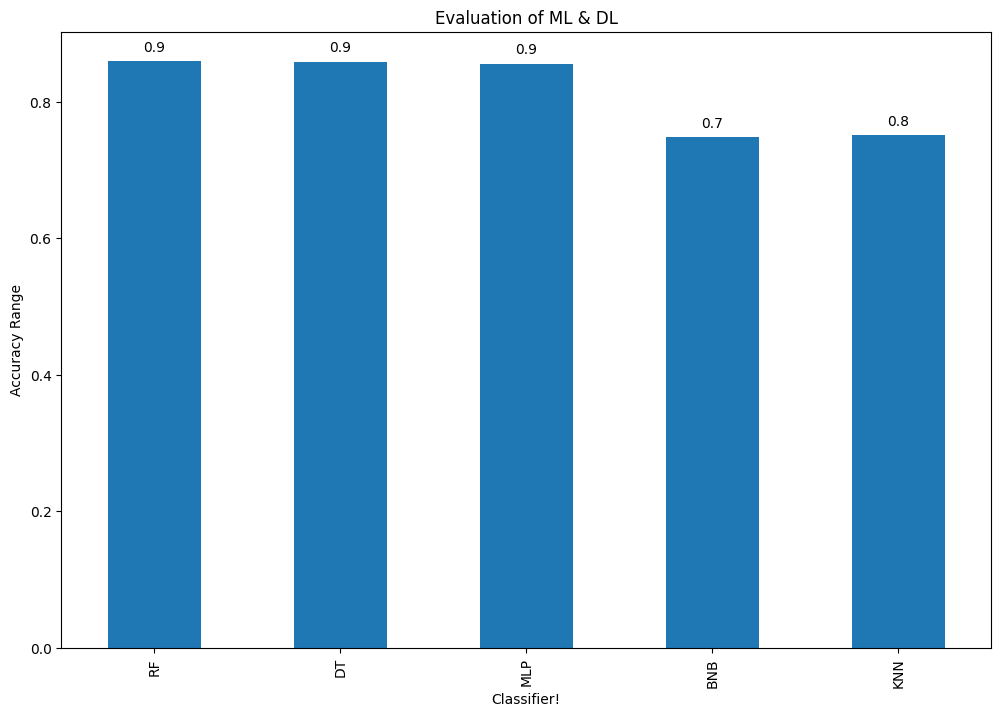

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Bring some raw data.
frequencies = [RF_ACC,DT_ACC,MLP_ACC,BNB_ACC,KNN_ACC]

# In my original code I create a series and run on that,
# so for consistency I create a series from the list.
freq_series = pd.Series(frequencies)

x_labels = ['RF','DT','MLP','BNB','KNN']

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title('Evaluation of ML & DL')
ax.set_xlabel('Classifier!')
ax.set_ylabel('Accuracy Range')
ax.set_xticklabels(x_labels)


def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)
plt.show()
#plt.savefig("image.png")

# Sensitivity

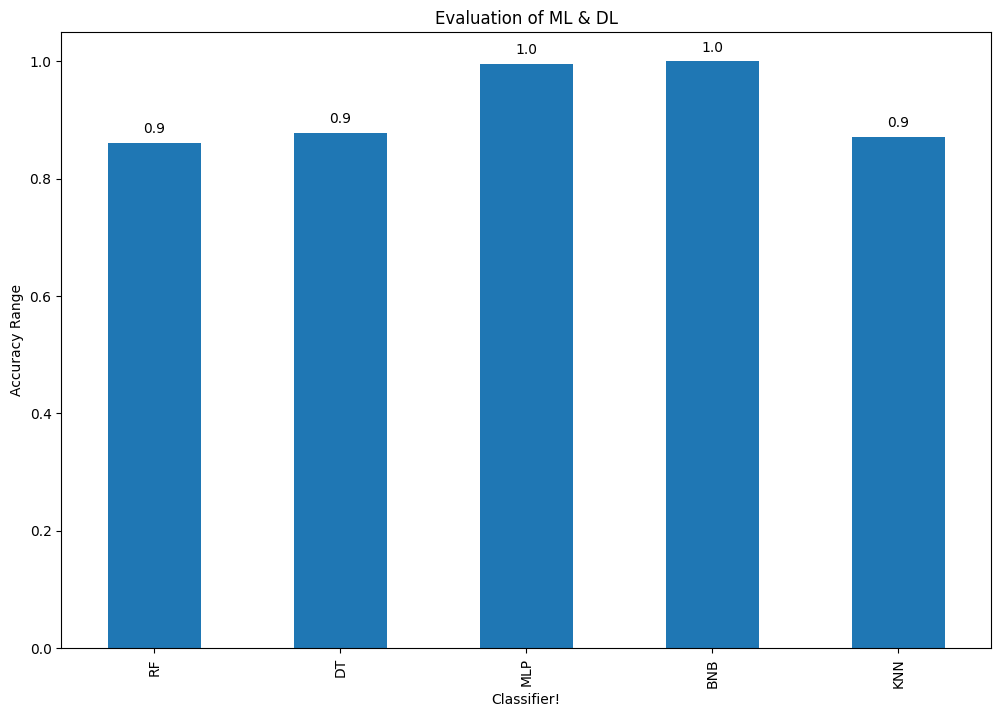

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Bring some raw data.
frequencies = [RF_sensitivity,DT_sensitivity,MLP_sensitivity,BNB_sensitivity,KNN_sensitivity]

# In my original code I create a series and run on that,
# so for consistency I create a series from the list.
freq_series = pd.Series(frequencies)

x_labels = ['RF','DT','MLP','BNB','KNN']

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title('Evaluation of ML & DL')
ax.set_xlabel('Classifier!')
ax.set_ylabel('Accuracy Range')
ax.set_xticklabels(x_labels)


def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)
plt.show()
#plt.savefig("image.png")

# Specificity

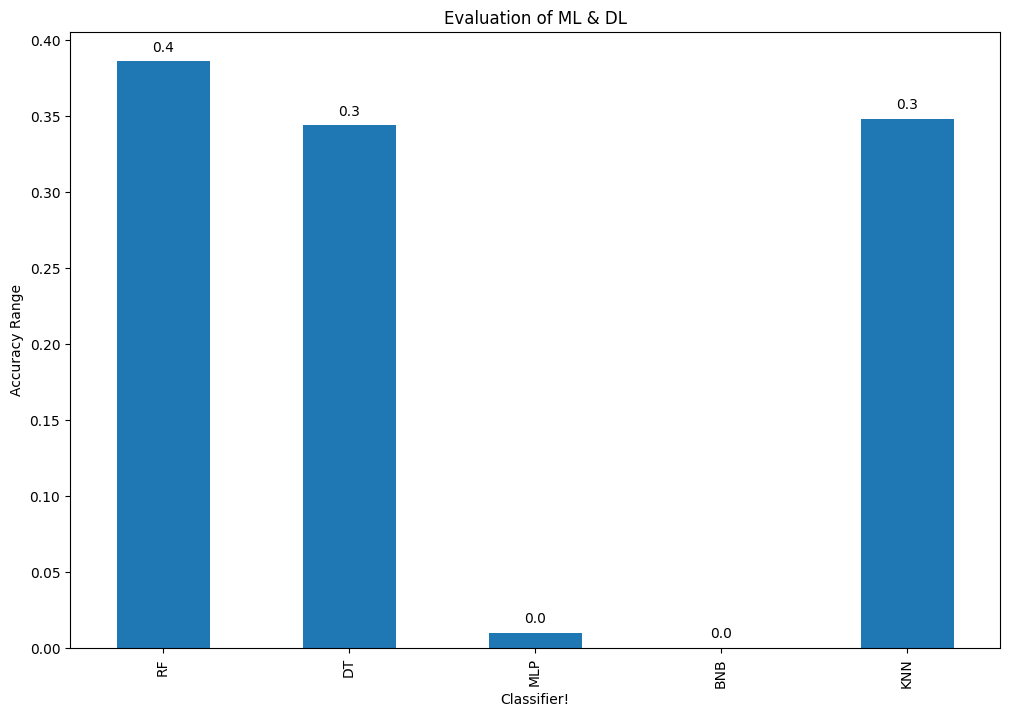

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Bring some raw data.
frequencies = [RF_specificity,DT_specificity,MLP_specificity,BNB_specificity,KNN_specificity]

# In my original code I create a series and run on that,
# so for consistency I create a series from the list.
freq_series = pd.Series(frequencies)

x_labels = ['RF','DT','MLP','BNB','KNN']

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title('Evaluation of ML & DL')
ax.set_xlabel('Classifier!')
ax.set_ylabel('Accuracy Range')
ax.set_xticklabels(x_labels)


def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)
plt.show()
#plt.savefig("image.png")

All Three

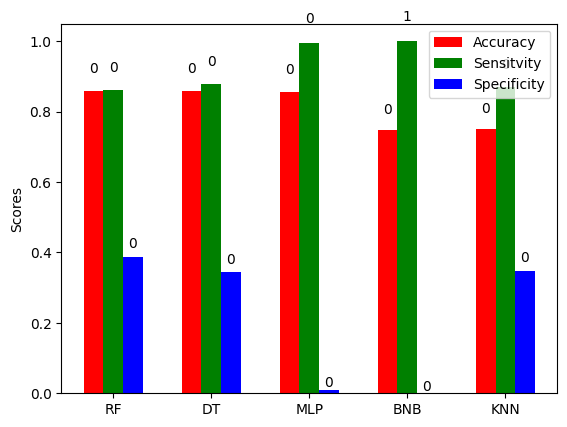

In [66]:
import numpy as np
import matplotlib.pyplot as plt

N = 5
ind = np.arange(N)  # the x locations for the groups
width = 0.2      # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = [RF_ACC,DT_ACC,MLP_ACC,BNB_ACC,KNN_ACC]

rects1 = ax.bar(ind, yvals, width, color='r')
zvals = [RF_sensitivity,DT_sensitivity,MLP_sensitivity,BNB_sensitivity,KNN_sensitivity]
rects2 = ax.bar(ind+width, zvals, width, color='g')
kvals = [RF_specificity,DT_specificity,MLP_specificity,BNB_specificity,KNN_specificity]
rects3 = ax.bar(ind+width*2, kvals, width, color='b')

ax.set_ylabel('Scores')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('RF','DT','MLP','BNB','KNN') )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('Accuracy', 'Sensitvity', 'Specificity') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()